#### FastAI and UNet
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [4]:
import os
import numpy as np
from pathlib import Path

from fastai.vision.all import *

cwd = Path.cwd()
path = os.path.join(cwd, "training_images")
path

'/mnt/c/workspace/eebio/battus-museum/mothra/data/training_images'

In [5]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
codes

array(['background', 'lepidopteran', 'tags', 'ruler'], dtype='<U12')

In [6]:
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])

Total Images: 8  	 Sample:  /mnt/c/workspace/eebio/battus-museum/mothra/data/training_images/images/IMG_1627.JPG


In [7]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

<Axes: >

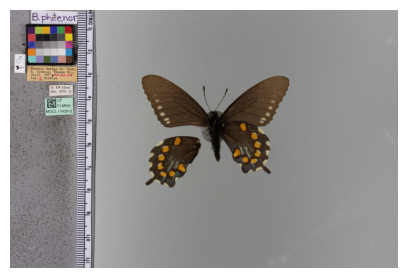

In [8]:
img = PILImage.create(files[1])
img.show(figsize=(5,5))

<Axes: >

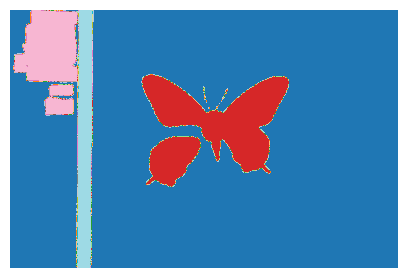

In [9]:
msk = PILMask.create(label_func(files[1]))
msk.show(figsize=(5,5), alpha=1)

In [11]:
print("Unique labels:",np.unique(msk))

Unique labels: [0 1 2 3]


In [12]:
name2id = {v:k for k,v in enumerate(codes)}
name2id

{'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}

In [13]:
dls = SegmentationDataLoaders.from_label_func(path, bs=2, fnames=files, label_func=label_func, codes=codes)

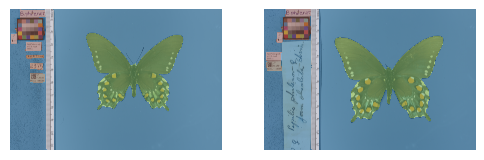

In [14]:
dls.show_batch()

In [15]:
# Now, loading the model 
learn = unet_learner(dls, resnet34, pretrained=True) # weights="./init/segmentation_test-4classes.pkl"

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/rahul/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 39.6MB/s]


In [16]:
# Train for 10 epochs
learn.fine_tune(10)

epoch,train_loss,valid_loss,time


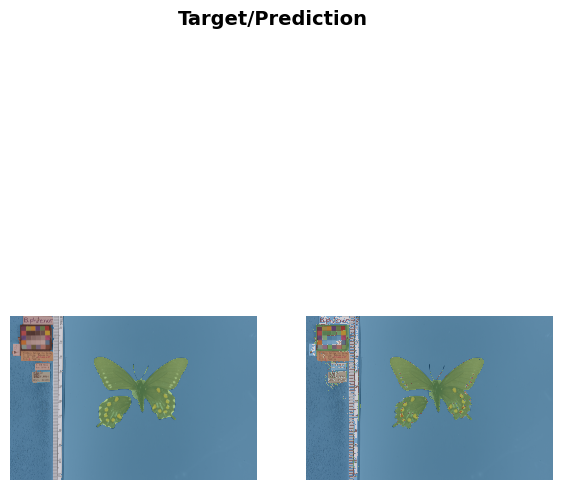

In [ ]:
learn.show_results(max_n=4, figsize=(7,8))

In [14]:
# Model save
learn.save('battus10_segmentation_test-4classes-resnet34-b2-e10')
# learn.load('battus10_segmentation_test-4classes');

Path('/home/rahul/workspace/vision/eeb/training_images/models/battus10_segmentation_test-4classes-resnet34-b2-e10.pth')

In [15]:
# Model export using pickle protocol - https://docs.fast.ai/learner.html#learner
learn.export('battus10_segmentation_test-4classes-resnet34-b2-e10.pkl')